In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [43]:
data = pd.read_csv("insurance.csv")

In [44]:
data.loc[data["sex"] == "male","sex"] = 1
data.loc[data["sex"] == "female","sex"] = 0

In [45]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [46]:
data.loc[data["region"] == "southwest","region"] = 0
data.loc[data["region"] == "southeast","region"] = 1
data.loc[data["region"] == "northwest","region"] = 2
data.loc[data["region"] == "northeast","region"] = 3

data.loc[data["smoker"] == "no","smoker"] = 0
data.loc[data["smoker"] == "yes","smoker"] = 1

In [47]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,2,10600.54830
1334,18,0,31.920,0,0,3,2205.98080
1335,18,0,36.850,0,0,1,1629.83350
1336,21,0,25.800,0,0,0,2007.94500


In [48]:
df = pd.DataFrame(data)
plt.rcParams['figure.dpi'] = 300

Text(0, 0.5, 'charges')

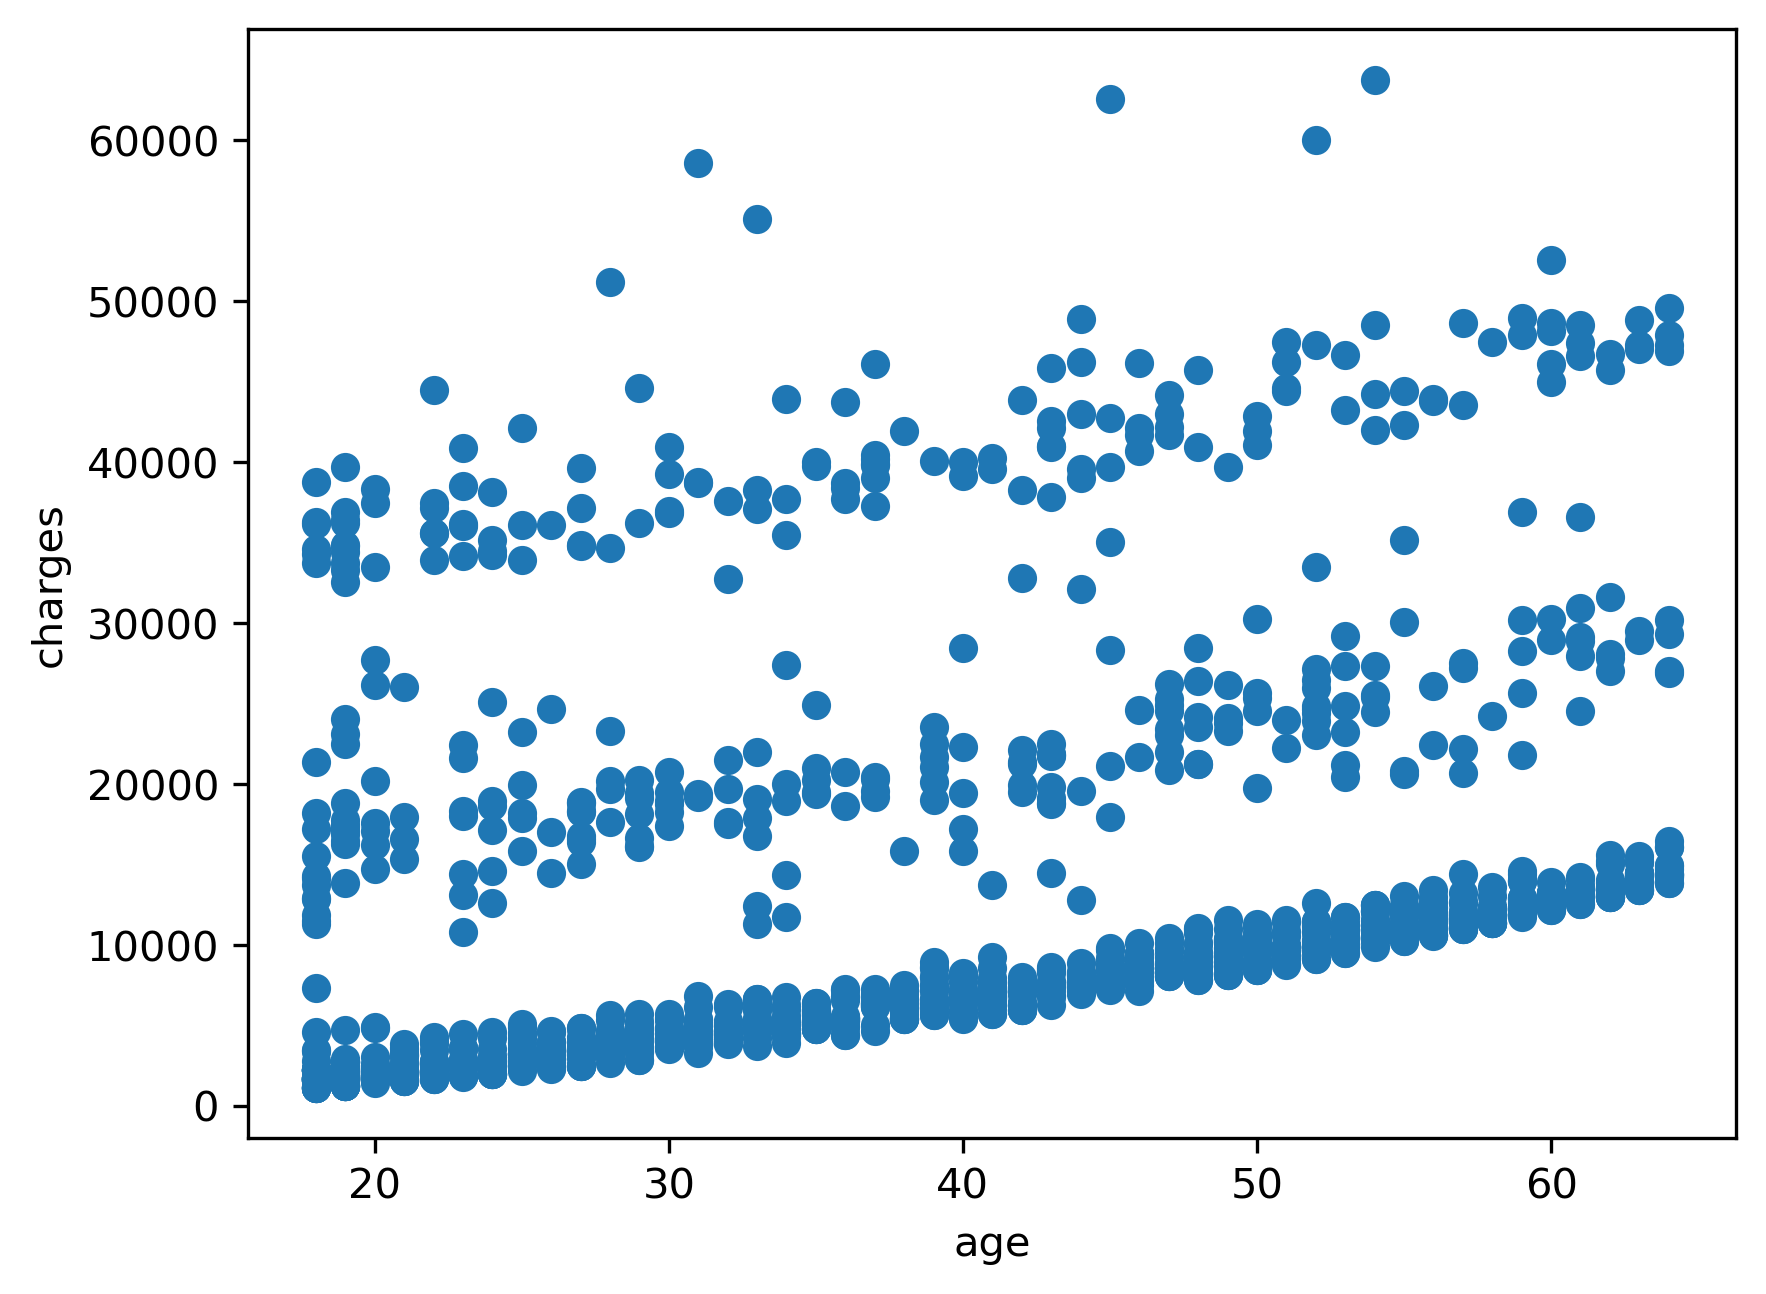

In [49]:
plt.scatter(df["age"],df["charges"])
plt.xlabel("age")
plt.ylabel("charges")

Text(0, 0.5, 'charges')

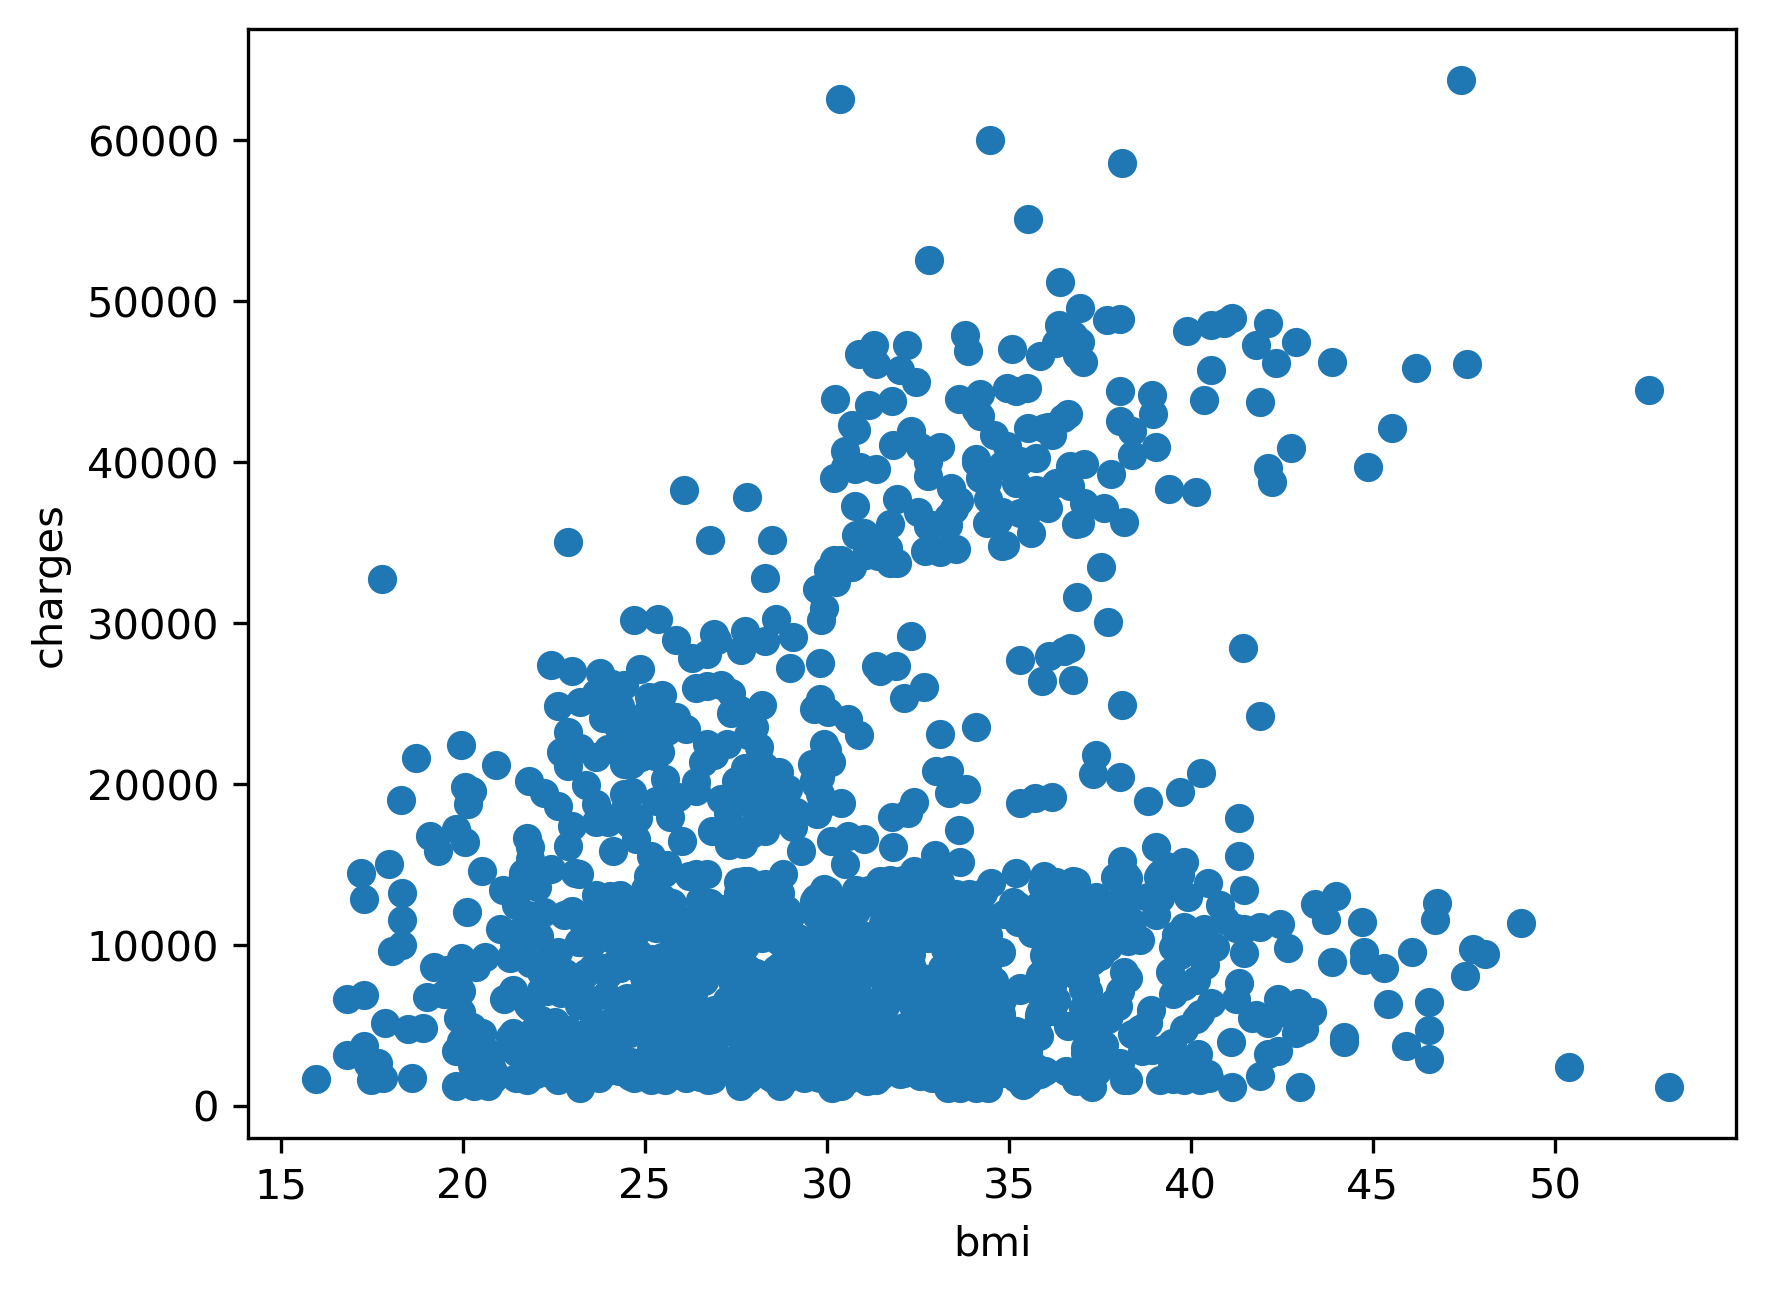

In [50]:
plt.scatter(df["bmi"],df["charges"])
plt.xlabel("bmi")
plt.ylabel("charges")

Text(0, 0.5, 'charges')

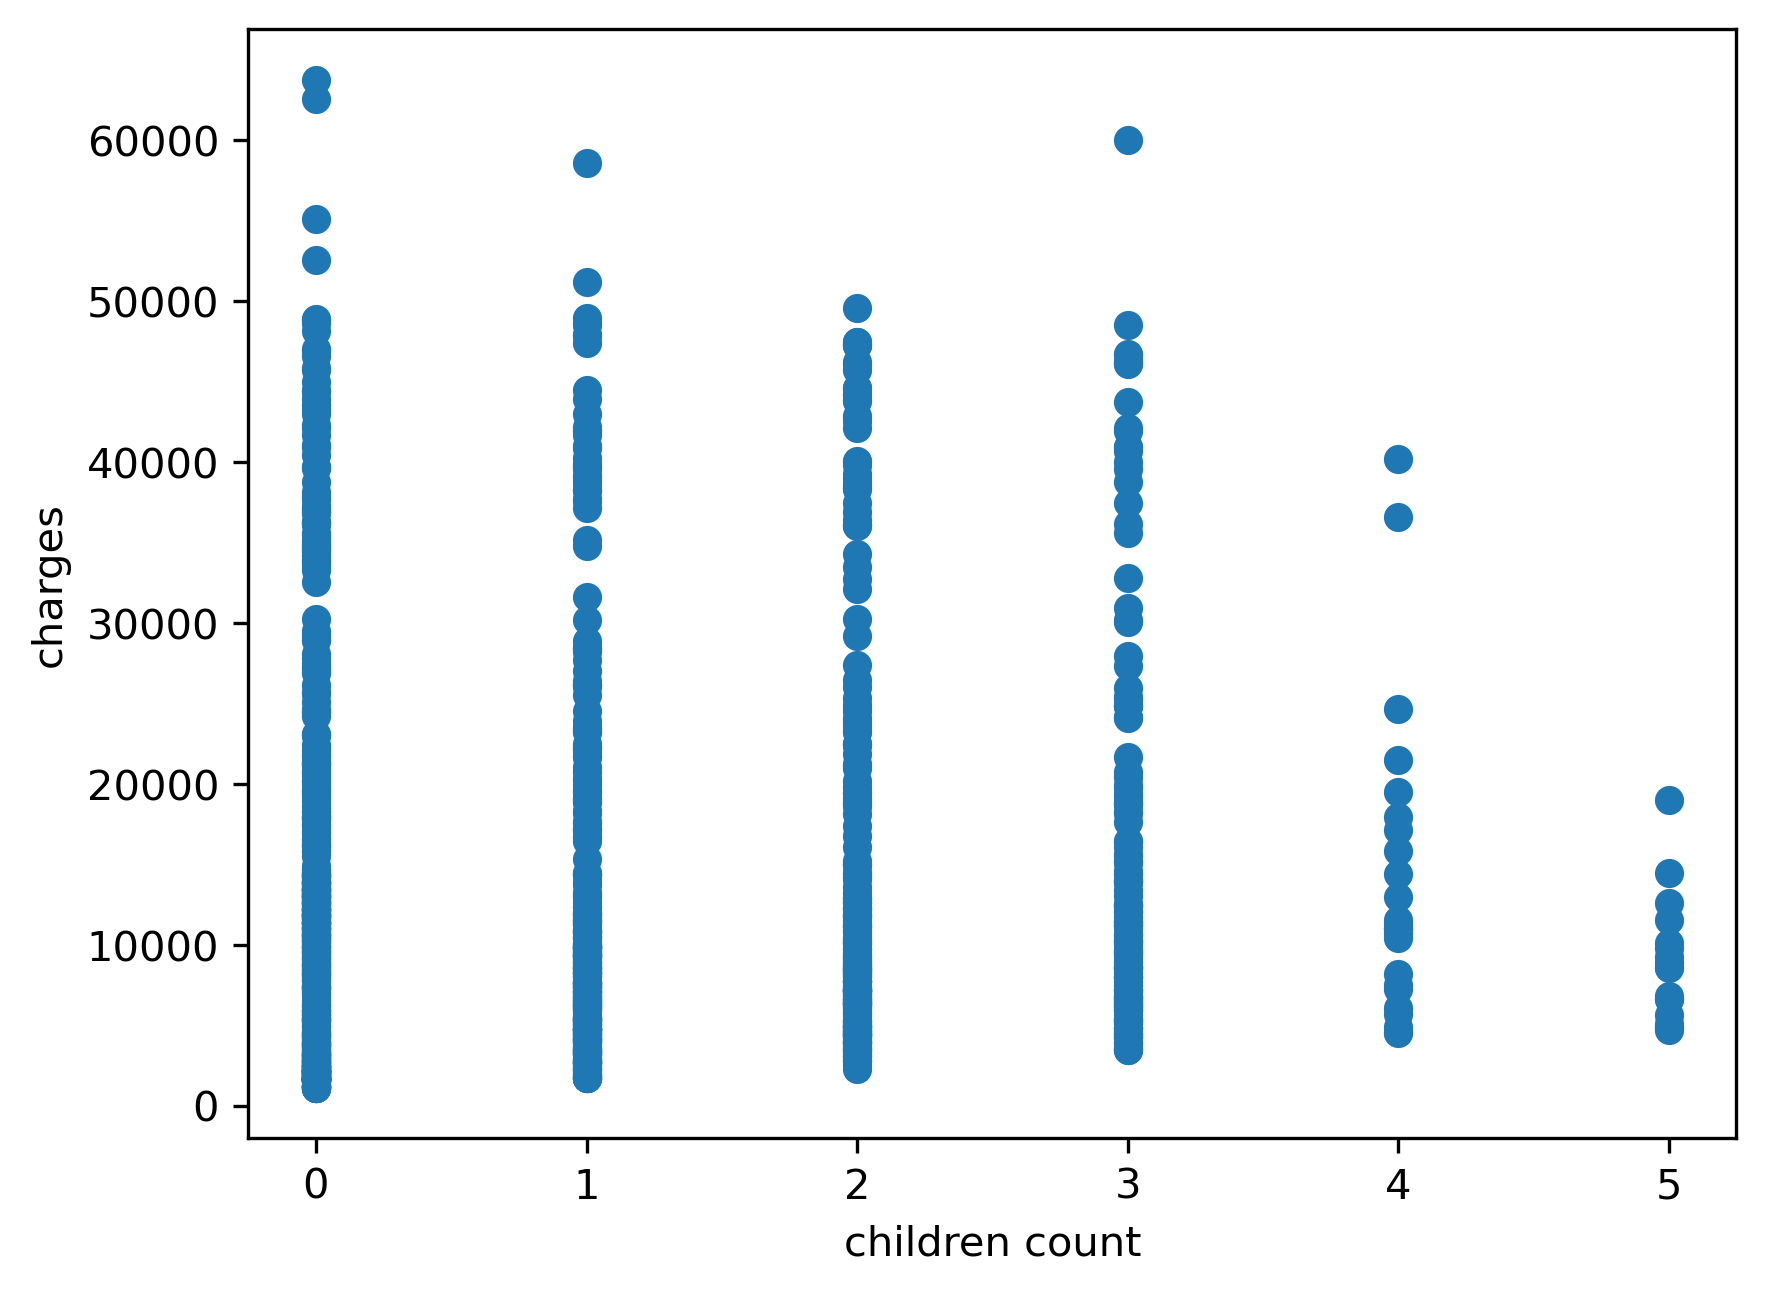

In [51]:
plt.scatter(df["children"],df["charges"])
plt.xlabel("children count")
plt.ylabel("charges")

Text(0, 0.5, 'charges')

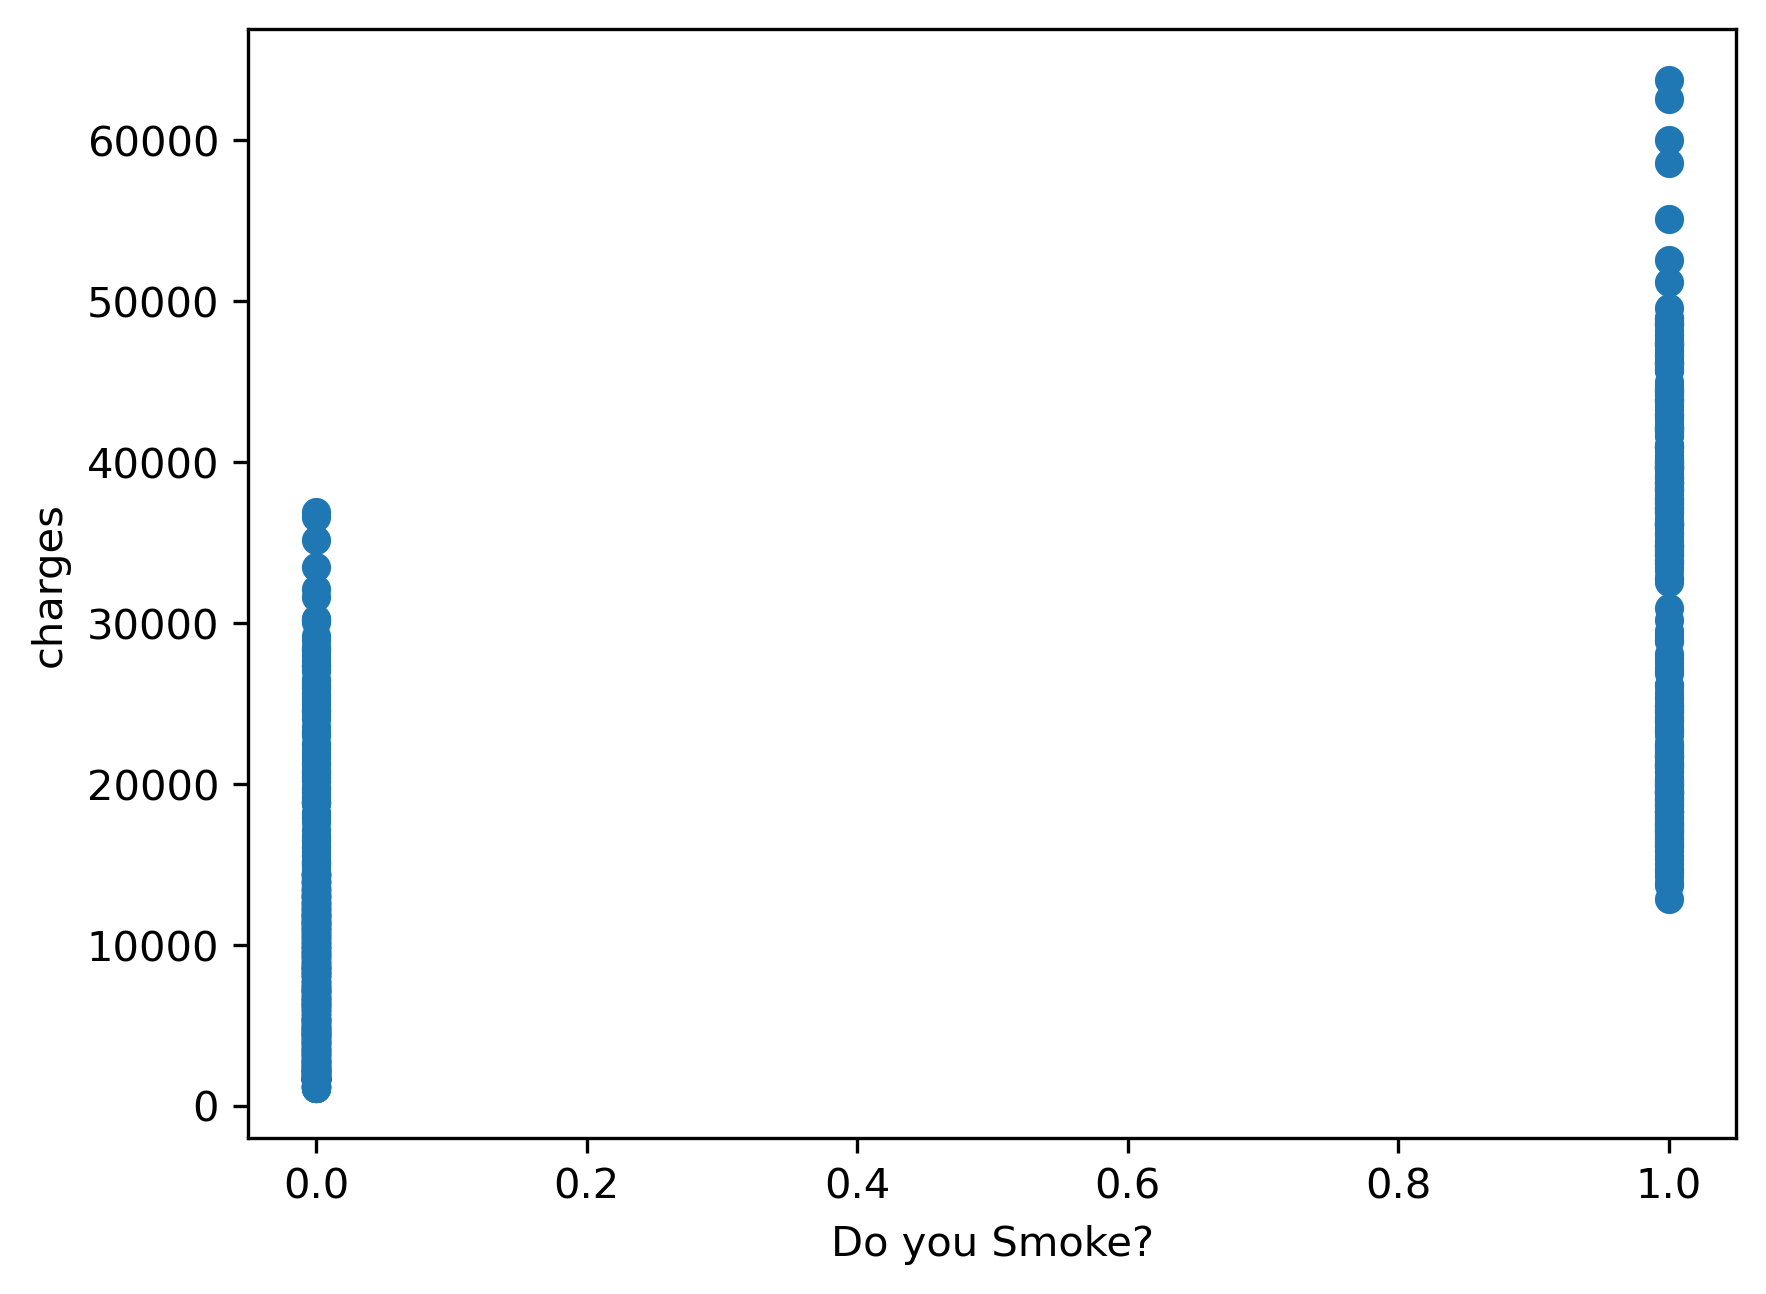

In [52]:
plt.scatter(df["smoker"],df["charges"])
plt.xlabel("Do you Smoke?")
plt.ylabel("charges")

Text(0, 0.5, 'charges')

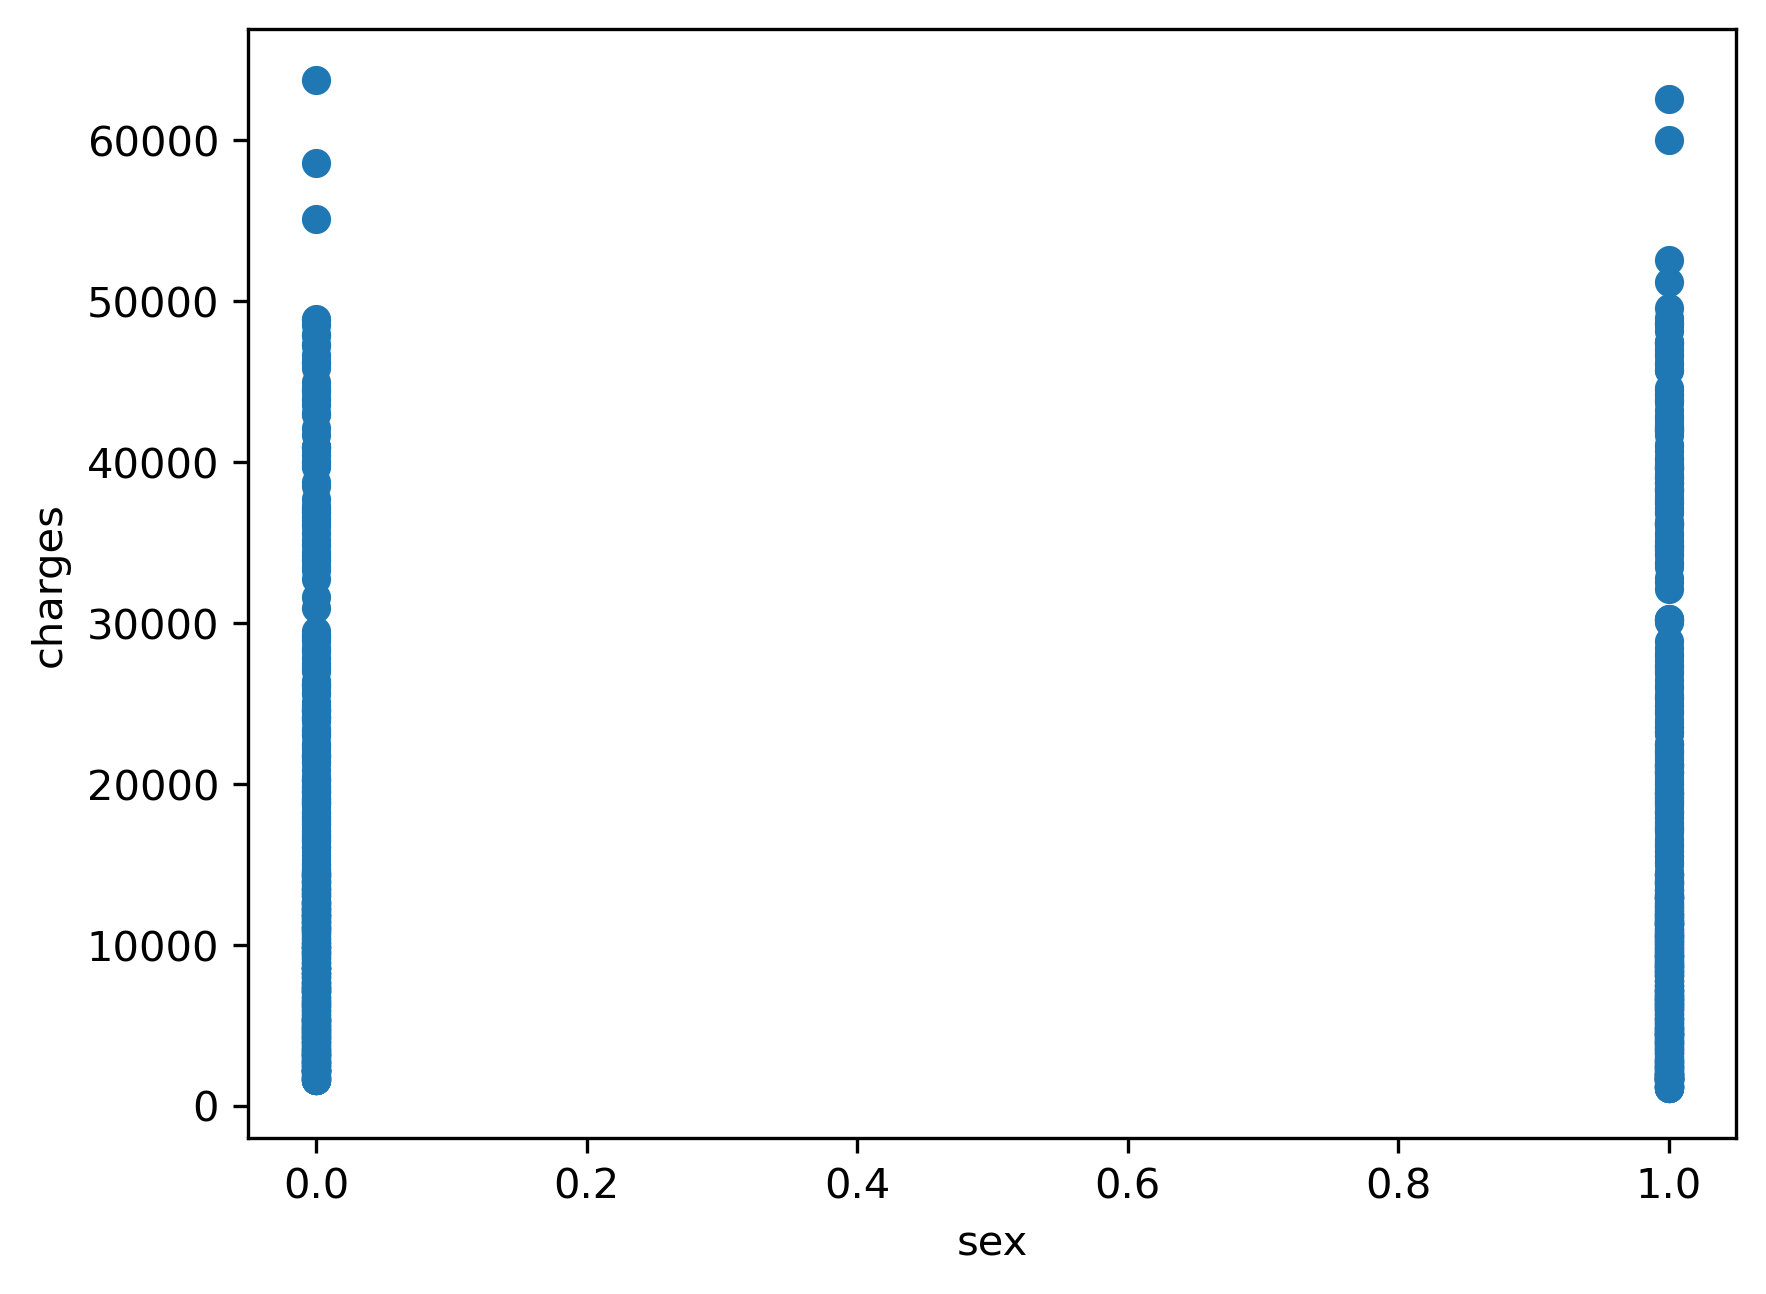

In [61]:
plt.scatter(df["sex"],df["charges"])
plt.xlabel("sex")
plt.ylabel("charges")

Text(0, 0.5, 'charges')

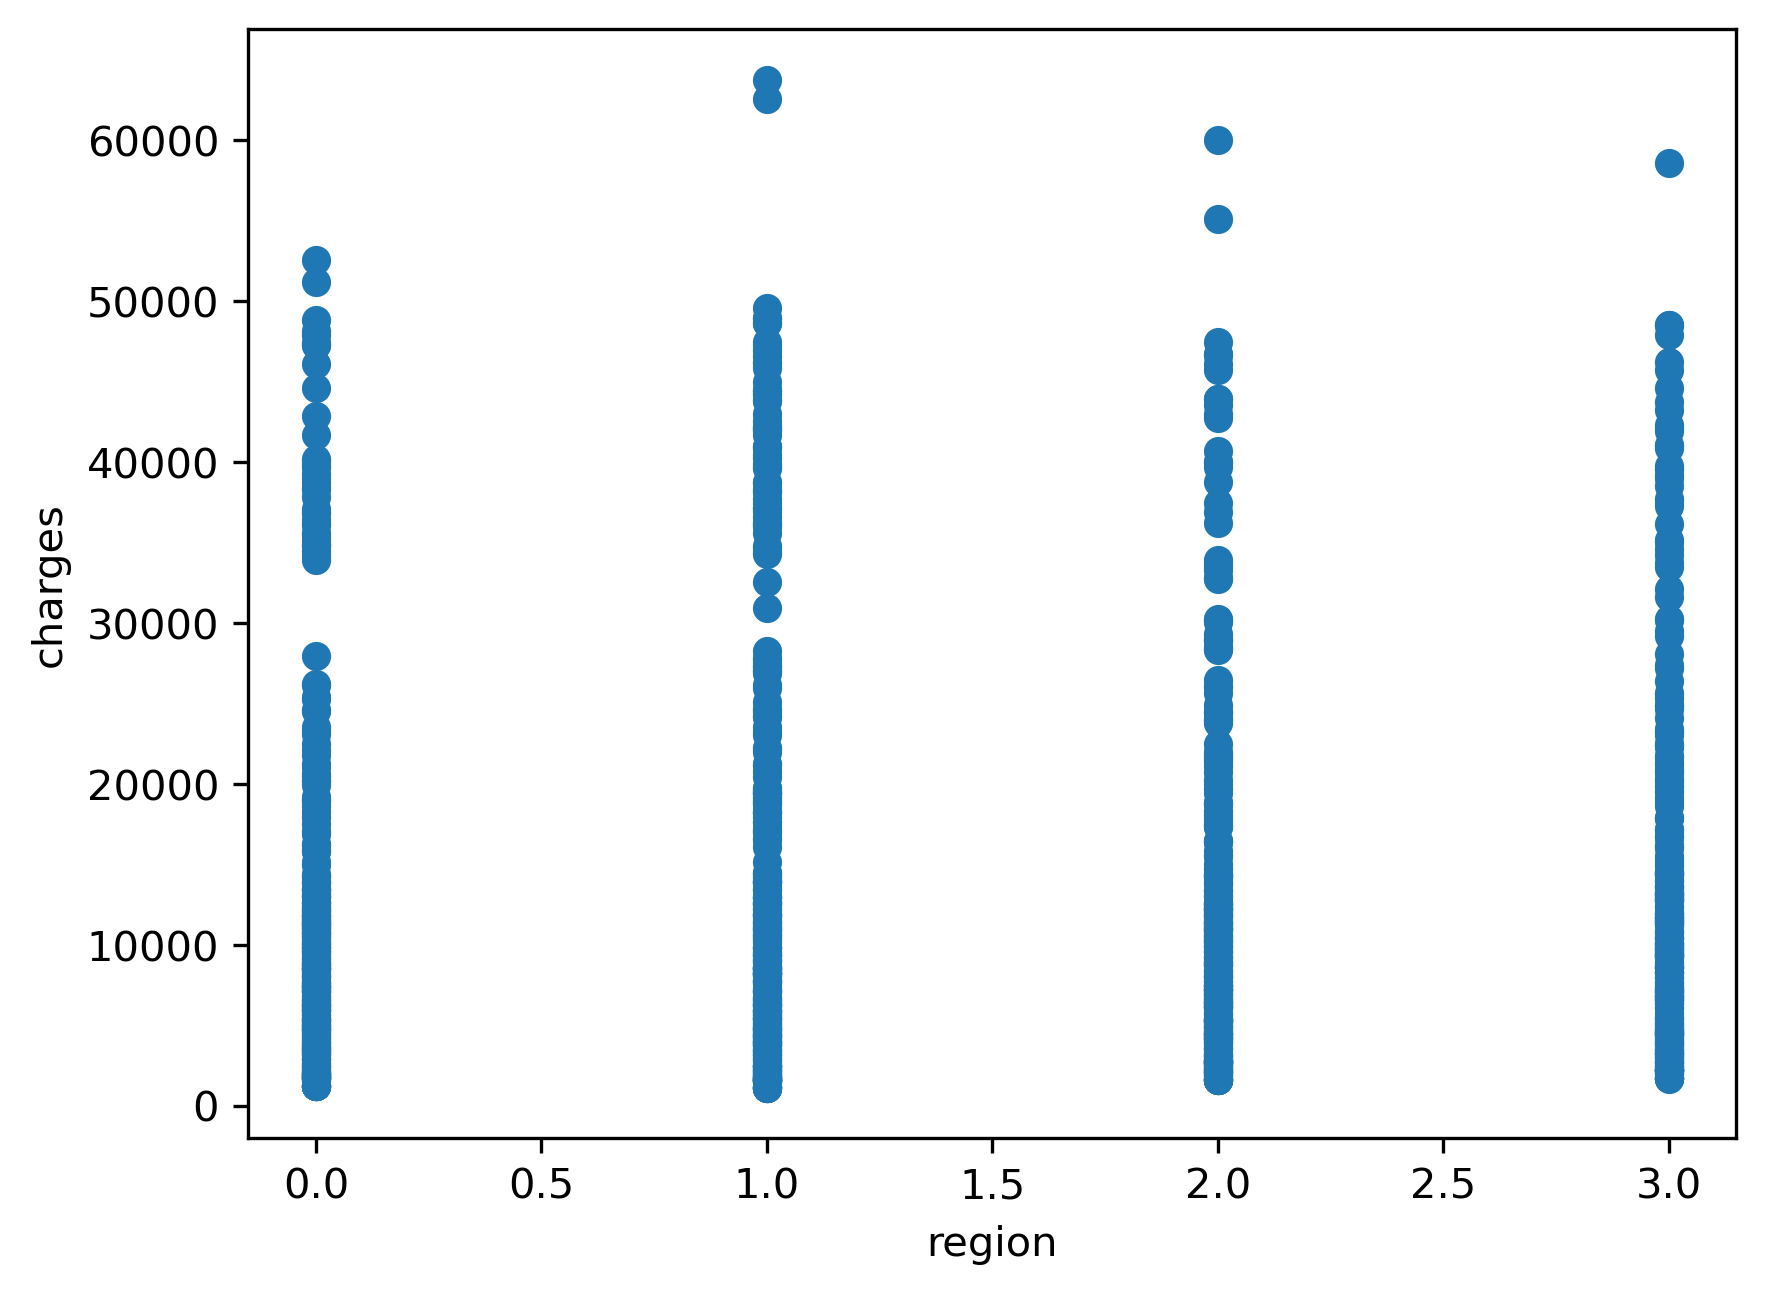

In [53]:
plt.scatter(df["region"],df["charges"])
plt.xlabel("region")
plt.ylabel("charges")

Text(0, 0.5, 'charges')

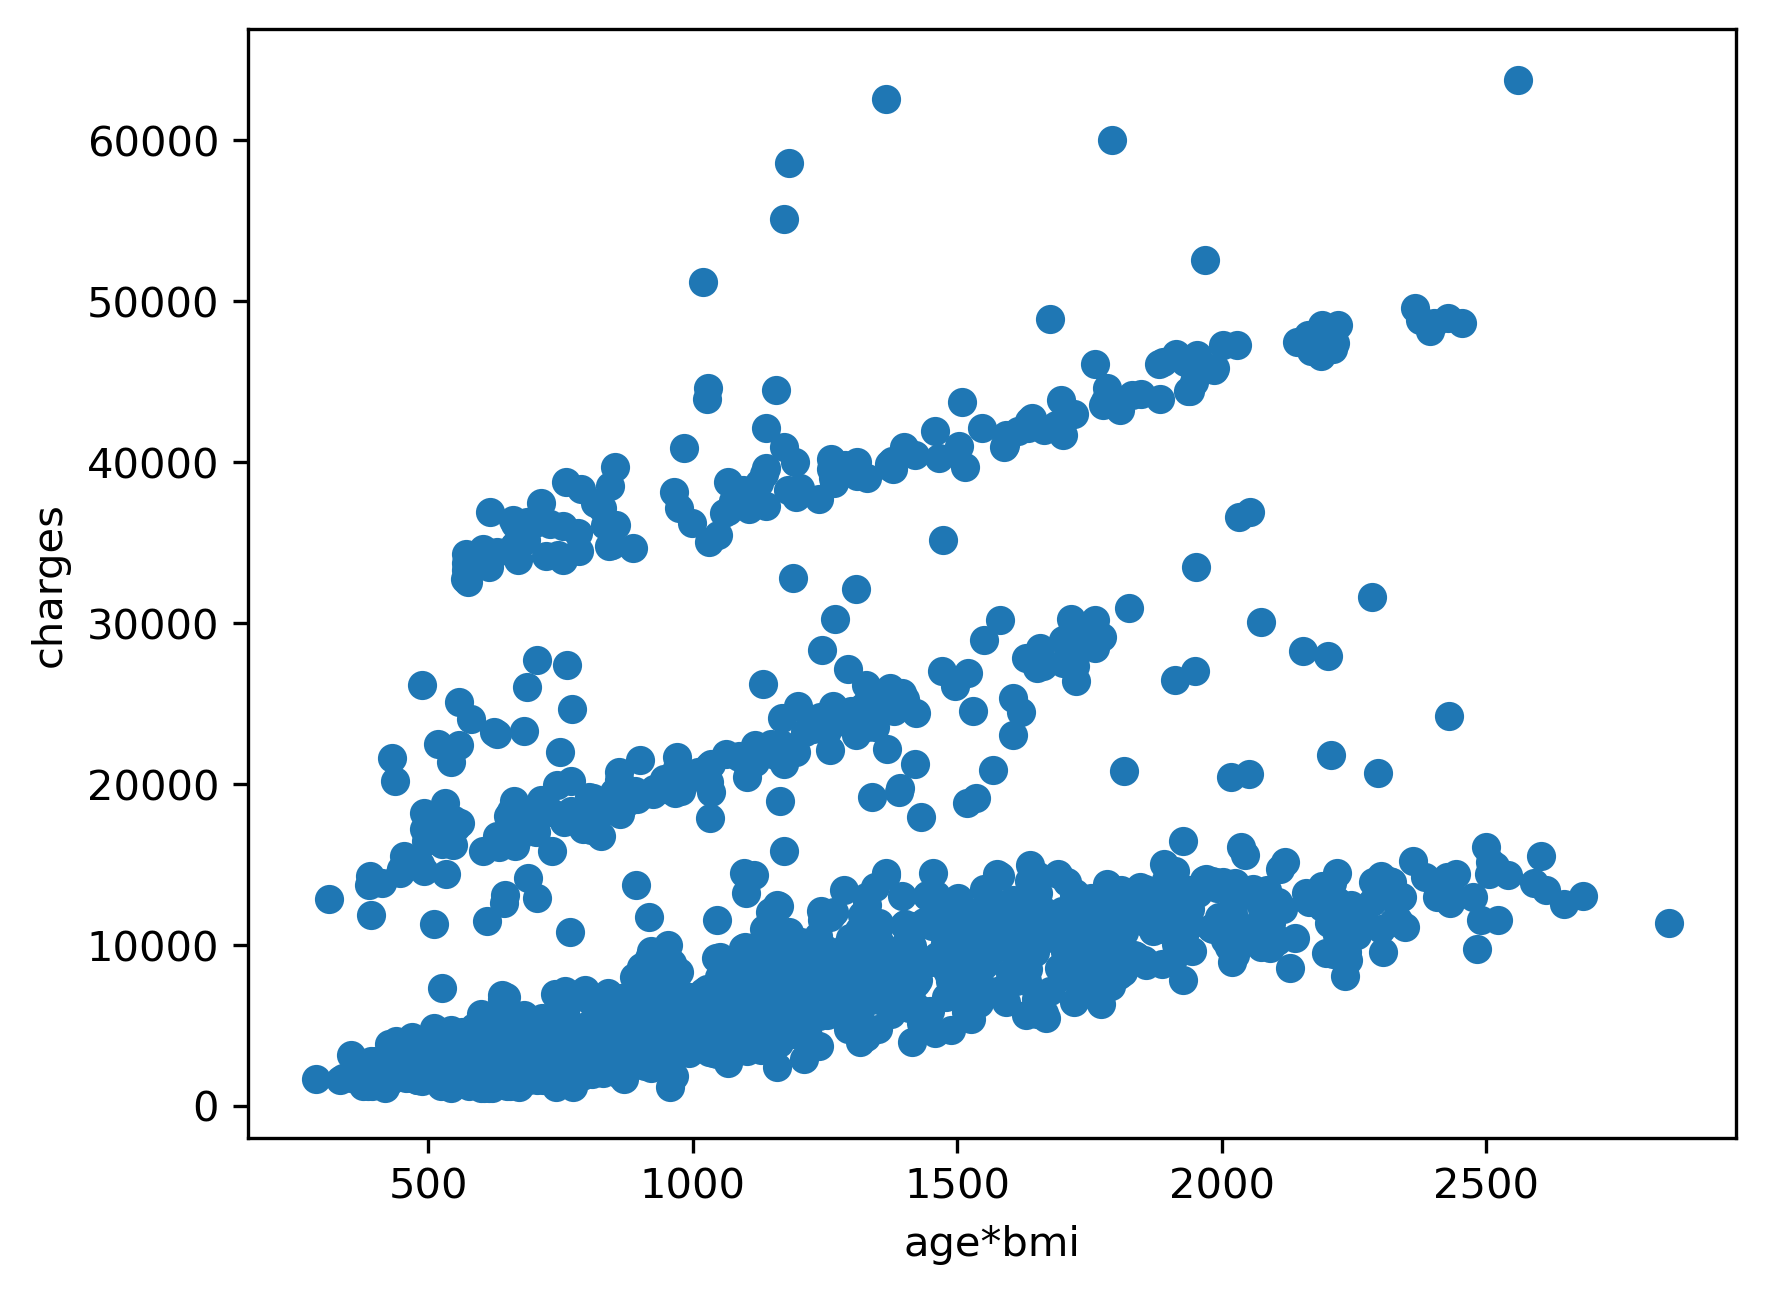

In [54]:
plt.scatter(df["age"]*df["bmi"],df["charges"])
plt.xlabel("age*bmi")
plt.ylabel("charges")

In [55]:
aPb = df["age"]*df["bmi"]
x = df.loc[:, ['age', 'smoker']].copy()
x.insert(2,"aPb",aPb,True)
y = df["charges"].values.reshape(-1,1)

In [56]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=0)
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [57]:
print(reg.intercept_)
print(reg.coef_)

[-1760.3160521]
[[3.98080191e+01 2.35581282e+04 7.08703539e+00]]


In [58]:
y_pred = reg.predict(x_test)

In [59]:
print("R2 Score: "+ str(metrics.r2_score(y_test,y_pred)))
print("MAE: "+ str(metrics.mean_absolute_error(y_test,y_pred)))
print("MSE: "+ str(metrics.mean_squared_error(y_test,y_pred)))

R2 Score: 0.8186130492011771
MAE: 4210.985023538311
MSE: 35171554.79797317


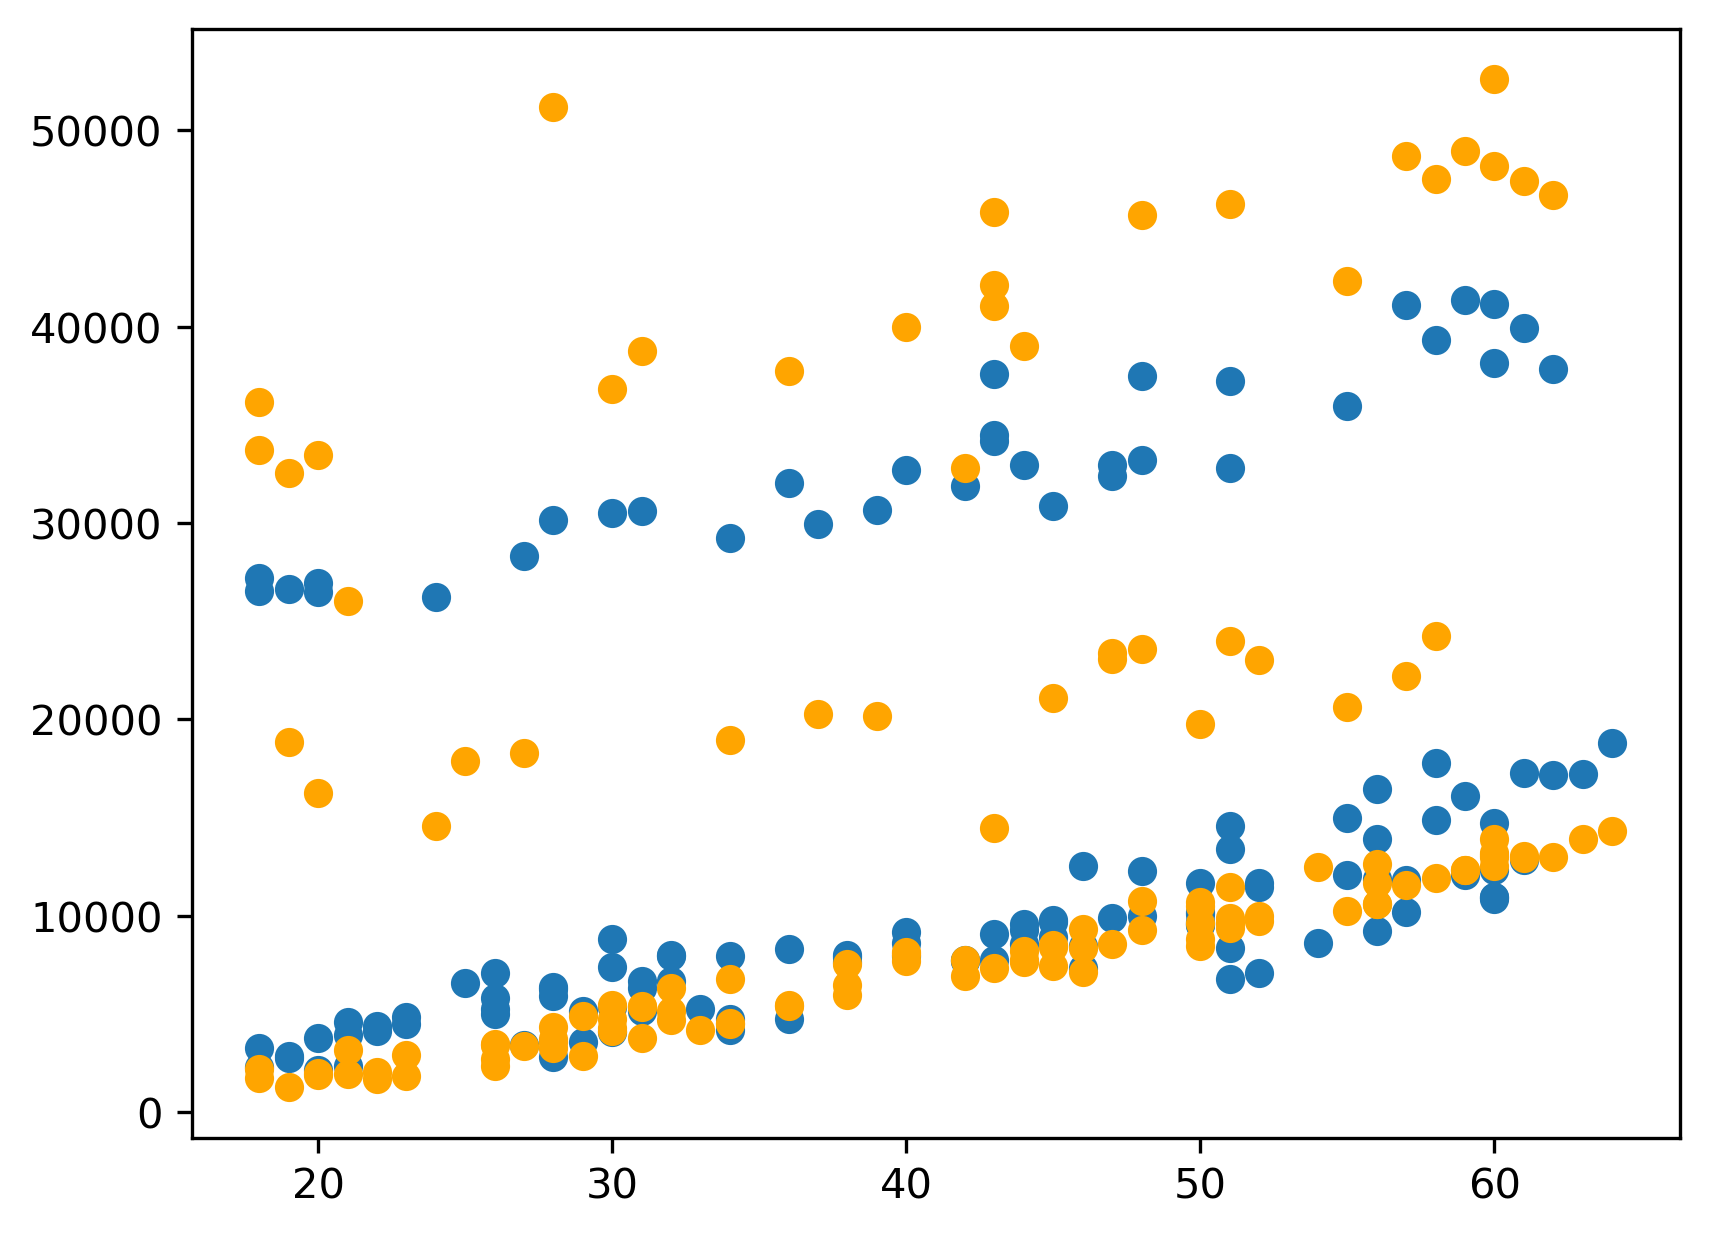

In [60]:
plt.scatter(x_test["age"],reg.predict(x_test))
x_test.insert(2,"charges",y_test,True)
x_test.sort_values(by="age",inplace=True)
plt.scatter(x_test["age"],x_test["charges"],color="orange")